In [1]:
import pm4py
import os
import pandas as pd


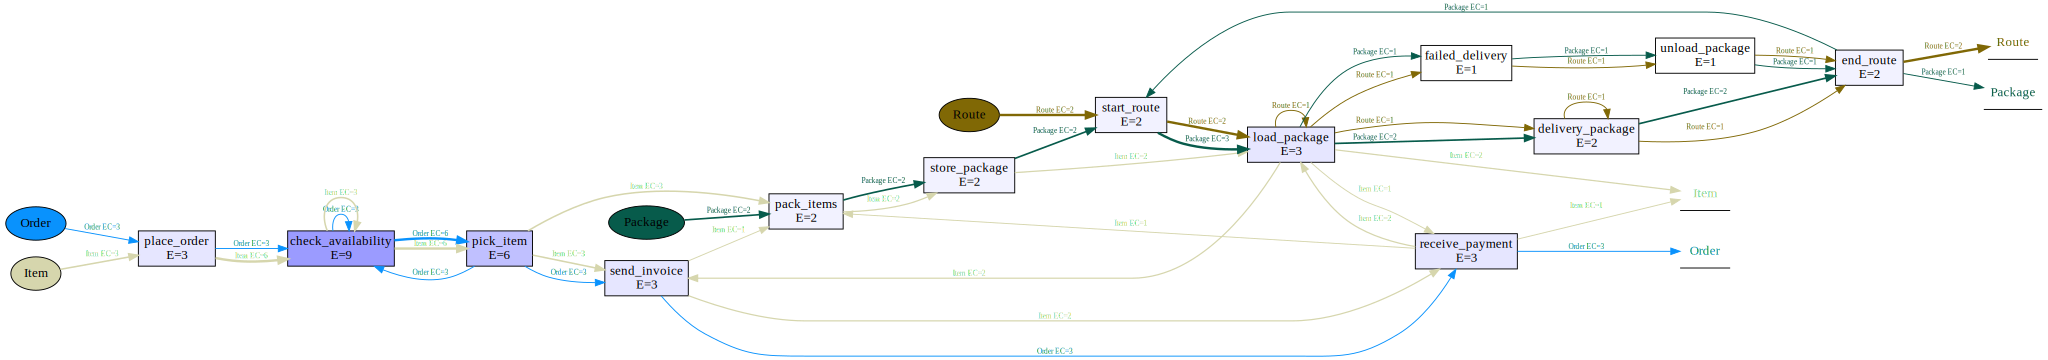

In [2]:
from pm4py.visualization.ocel.ocdfg import visualizer as ocdfg_visualization

file_path = 'C:/Users/qings/OneDrive/Desktop/pm4py/Table1.jsonocel'
ocel = pm4py.read_ocel(file_path)
ocdfg = pm4py.discover_ocdfg(ocel)
ocdfg_visualization.apply(ocdfg)

In [3]:
ocel

Object-Centric Event Log (number of events: 39, number of objects: 13, number of activities: 13, number of object types: 4, events-objects relationships: 106)
Activities occurrences: {'check_availability': 9, 'pick_item': 6, 'place_order': 3, 'load_package': 3, 'send_invoice': 3, 'receive_payment': 3, 'pack_items': 2, 'store_package': 2, 'start_route': 2, 'end_route': 2, 'delivery_package': 2, 'failed_delivery': 1, 'unload_package': 1}
Object types occurrences (number of objects): {'Item': 6, 'Order': 3, 'Package': 2, 'Route': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

In [4]:
object_types = pm4py.ocel_get_object_types(ocel)
print(object_types)

['Order', 'Item', 'Package', 'Route']


In [5]:
# Method 1  :directly use Filter on Allowed Activities per Object Type via observing the results of Fig.7
filtered_ocel = pm4py.filter_ocel_object_types_allowed_activities(ocel, 
                                                                  {"Order": ["place_order","send_invoice","receive_payment"], 
                                                                   "Item": ["place_order", "check_availability","pick_item","pack_items"],
                                                                  "Package":["pack_items","store_package","load_package","delivery_package","failed_delivery","upload_package"],
                                                                  "Route":["start_route","load_package","deliver_package","failed_delivery","unload_package","end_route"]})
filtered_ocel

Object-Centric Event Log (number of events: 39, number of objects: 13, number of activities: 13, number of object types: 4, events-objects relationships: 55)
Activities occurrences: {'check_availability': 9, 'pick_item': 6, 'place_order': 3, 'load_package': 3, 'send_invoice': 3, 'receive_payment': 3, 'pack_items': 2, 'store_package': 2, 'start_route': 2, 'end_route': 2, 'delivery_package': 2, 'failed_delivery': 1, 'unload_package': 1}
Object types occurrences (number of objects): {'Item': 6, 'Order': 3, 'Package': 2, 'Route': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

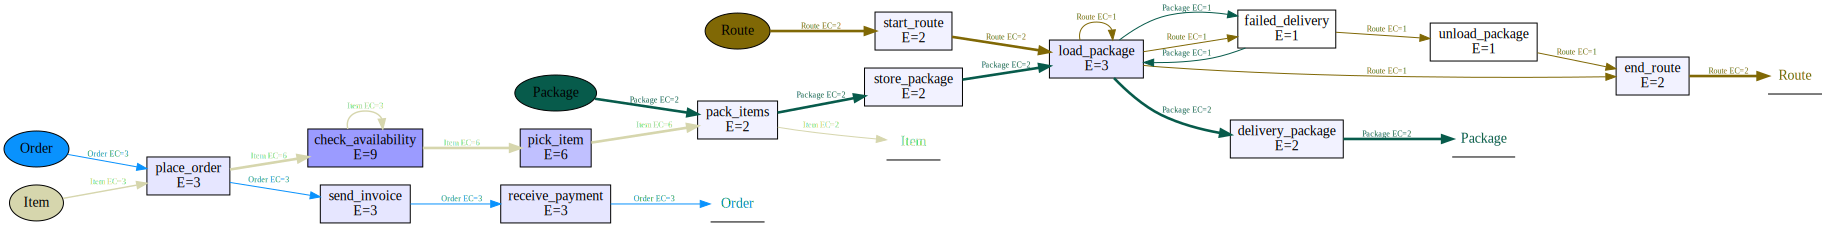

In [6]:
filtered_ocdfg = pm4py.discover_ocdfg(filtered_ocel)
ocdfg_visualization.apply(filtered_ocdfg)


In [8]:
exporting_file_path = 'C:/Users/qings/OneDrive/Desktop/pm4py/Table2.jsonocel'
pm4py.write_ocel(filtered_ocel, exporting_file_path)